In [1]:
import sys
import os
print(os.getcwd())
sys.path.append('/Users/thomasbutterworth/Documents/GitHub/ramlab/src')

from ramlab.molecules import NO
import matplotlib.pyplot as plt
import numpy as np
from ramlab.simulate.simulation import simulate

M = NO()


transitions = M.get_all_transitions(laser_wavelength=532.5e-9, force_recalculate=True)



/Users/thomasbutterworth/Documents/GitHub/ramlab/demo
Loading NO molecule...
Generating linelist file...
[0]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5]
[-0.5  0.5]
[-1  1]
[-1.5 -0.5  0.5  1.5]
1033
Assigning other quantum states
Calculating linestrengths for 1033...
Cross sections complete
Depolarization ratio complete


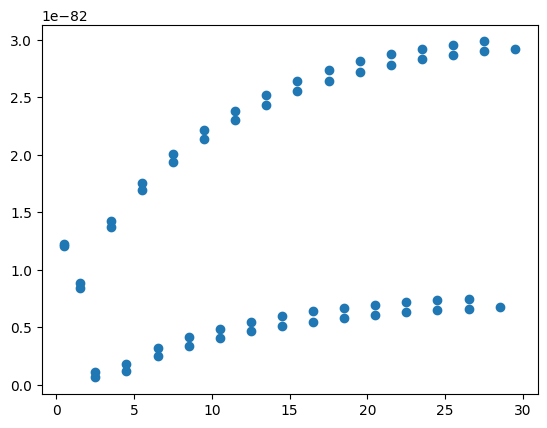

In [37]:
NO_o = transitions[(transitions.dO == 1) & (transitions.dJ ==1)]
plt.scatter(NO_o.initial_J,np.abs(NO_o.crosssection))
# NO_o = transitions[transitions.dO ==(-1 or 1)]
# plt.scatter(NO_o.initial_J,NO_o.crosssection,color = 'red')
#plt.yscale('log')

[-200.         -199.95417811 -199.90835623 ...  258.08140541  258.1272273
  258.17304918]


(0.0, 200.0)

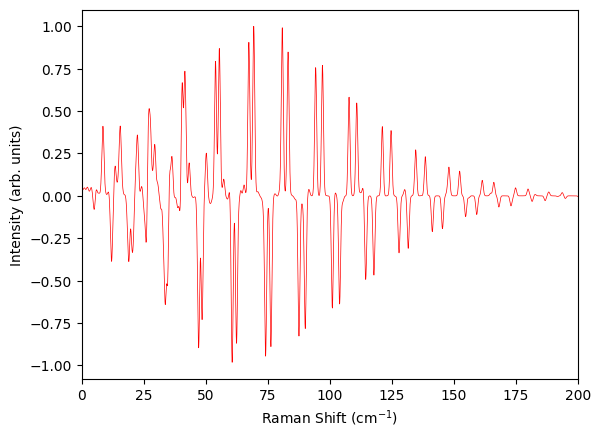

In [38]:

# Calculate the intensity of the transitions for T=860 K
NO_v = transitions#[transitions.dO== (1.or -1.)]
I_stick = M.get_intensity(NO_v, T=300)
#print (len(NO_v.linelist))
# Simulate the spectrum with Gaussian and Lorentzian broadening
dnu_stick = NO_v.vacuum_wavenumber
dnu_sim = np.linspace(-200, dnu_stick.max(),10000)
I_sim = simulate(dnu_sim, dnu_stick, I_stick, 0.4, 0, N_bin=10)

print(dnu_sim)
plt.figure()
plt.vlines(dnu_stick, 0, I_stick , color="k", alpha=0.5, label="Stick spectrum")
plt.plot(dnu_sim, I_sim /np.max(I_sim), color="r", label="Simulated spectrum",linewidth = 0.5)

plt.xlabel("Raman Shift (cm$^{-1}$)")
plt.ylabel("Intensity (arb. units)")

plt.xlim(0,200)


In [39]:
transitions.crosssection

array([ 0.00000000e+00,  0.00000000e+00, -3.33465823e-83, ...,
        2.98377739e-82, -4.40389793e-81,  1.50594845e-82])

Text(0, 0.5, 'Intensity (arb. units)')

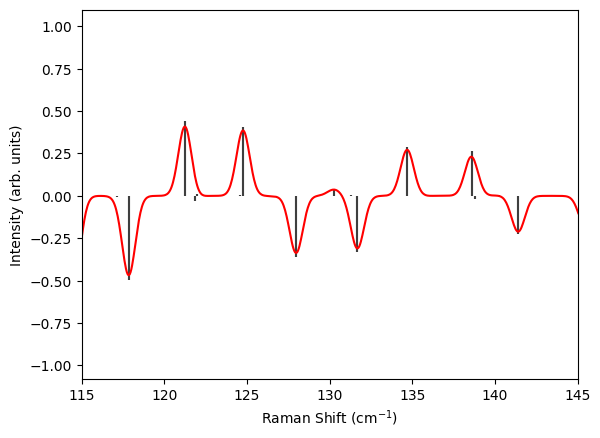

In [40]:
I_sim = simulate(dnu_sim, dnu_stick, I_stick, 0.4, 0, N_bin=10)
plt.figure()
plt.vlines(dnu_stick, 0, I_stick /np.max(I_stick), color="k", alpha=0.5, label="Stick spectrum")
plt.plot(dnu_sim, I_sim/np.max(I_sim) , color="r", label="Simulated spectrum")
plt.xlim(115,145)
plt.xlabel("Raman Shift (cm$^{-1}$)")
plt.ylabel("Intensity (arb. units)")